In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [45]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [46]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

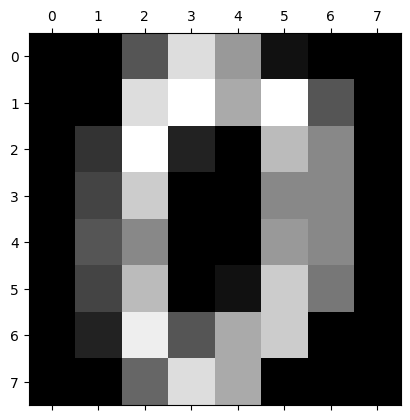

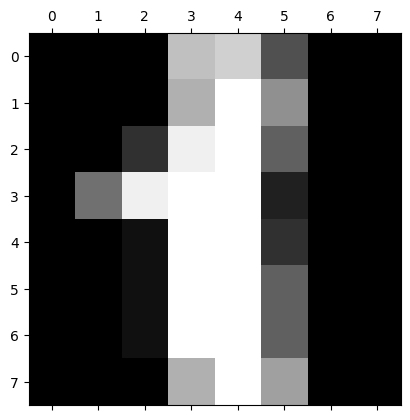

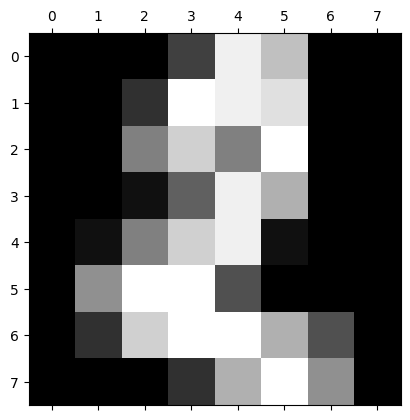

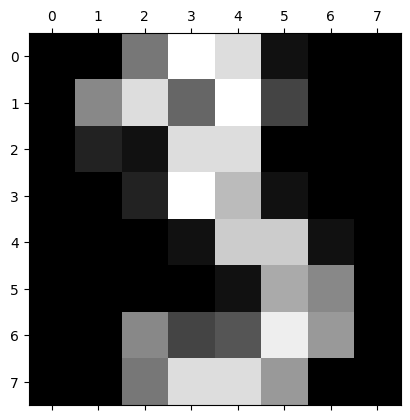

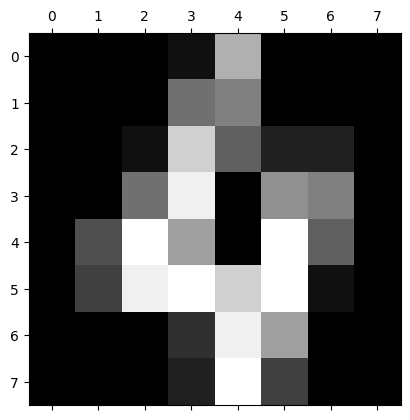

In [47]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [48]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [50]:
len(X_train)

1437

In [51]:
len(X_test)

360

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
model.score(X_test, y_test)

0.9527777777777777

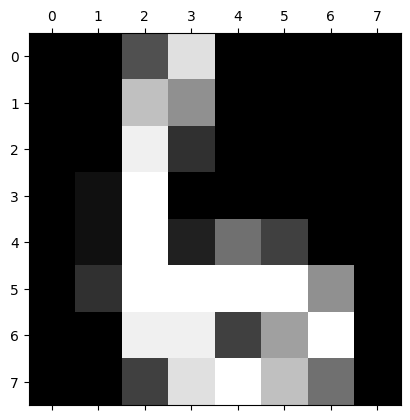

In [55]:
plt.matshow(digits.images[67])

In [56]:
digits.target[67]

np.int64(6)

In [57]:
model.predict([digits.data[67]])

array([6])

In [58]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [59]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  1,  0,  0,  1,  1],
       [ 1,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  1, 32,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  1,  0, 28,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 37,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 24]])

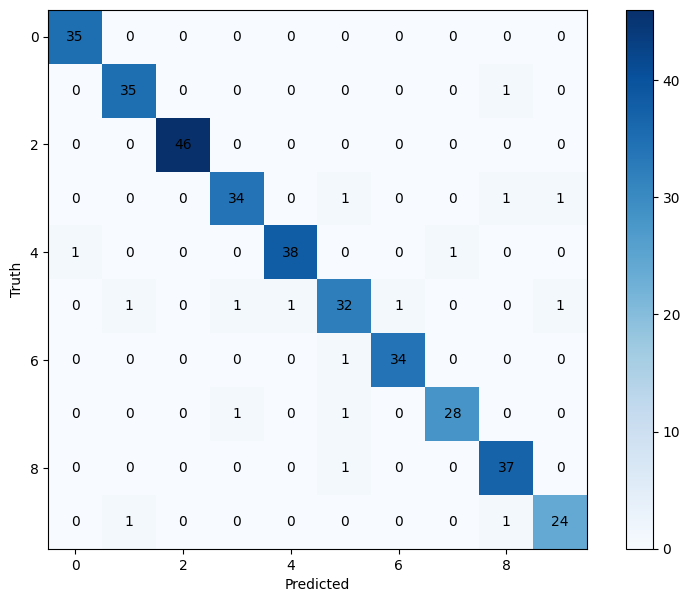

In [60]:
plt.figure(figsize=(10,7))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.show()